<a href="https://colab.research.google.com/github/Jaime44/WorkSpace/blob/main/models/colaborative%20filter/FINal_movie-recommendation-system-collaborative-filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/code/jaime44/movie-recommendation-system-collaborative-filter/edit

In [1]:
import os
# Comprueba si el código se está ejecutando en Google Colab
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

path_absolute = ''
if IN_COLAB:
    print("El código se está ejecutando en Google Colab.")
    from google.colab import drive

    drive.mount('/content/drive')
    path_absolute = '/content/drive/Othercomputers/Mi_portátil/TFM/WorkSpace/Models/colaborative filter'

    # Cambia al directorio de tu carpeta en Google Drive
    os.chdir(path_absolute)

    # Lista los archivos y carpetas en el directorio actual
    contenido_carpeta = os.listdir(path_absolute)
    print("Contenido de la carpeta en Google Drive:")
    print(contenido_carpeta)
else:
    print("El código se está ejecutando en un entorno local.")
    path_absolute = os.getcwd().replace("\\", "/")

datasets_path = "/datasets/"
path_absolute = path_absolute+datasets_path

El código se está ejecutando en Google Colab.
Mounted at /content/drive
Contenido de la carpeta en Google Drive:
['datasets', 'CF_The_age_of_recommeder_System_Original.ipynb', 'cf-based-recsys-by-low-rank-matrix-factorization_Original.ipynb', 'recommendation-systems-tutorial_Original.ipynb', 'recommender-systems-in-python_Original.ipynb', 'netflix-movie-recommendation_Original.ipynb', 'movie-recommender-systems_Original.ipynb', 'movie-recommendation-with-collaborative-filtering_Original.ipynb', 'recommender-systems-in-python-101_Original.ipynb', 'movie-recommendation-with-collaborative-filtering.ipynb', 'movie-recommender-systems.ipynb', 'recommender-systems-in-python.ipynb', 'netflix-movie-recommendation.ipynb', 'recommender-systems-in-python-101.ipynb', 'recommendation-systems-tutorial.ipynb', 'CF_The_age_of_recommeder_System.ipynb', 'movie-recommendation-system-collaborative-filter_Original.ipynb', 'cf-based-recsys-by-low-rank-matrix-factorization.ipynb', 'movie-recommendation-syste

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Collaborative Filtering**

<small>Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users.

It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user. It looks at the items they like and combines them to create a ranked list of suggestions.

There are many ways to decide which users are similar and combine their choices to create a list of recommendations</small>

El filtrado colaborativo es una técnica que puede filtrar elementos que podrían gustar a un usuario basándose en las reacciones de usuarios similares.

Funciona buscando en un grupo grande de personas y encontrando un conjunto más pequeño de usuarios con gustos similares a los de un usuario concreto. Observa los artículos que les gustan y los combina para crear una lista clasificada de sugerencias.

Hay muchas formas de decidir qué usuarios son similares y combinar sus elecciones para crear una lista de recomendaciones

![colaborative filtering.png](attachment:5c14f24e-aec1-4538-9e9e-c3361ecad485.png)

En nuestro proyecto utilizamos el método de correlación

# 1.Import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print("libraries imported..")

libraries imported..


# 2. load two datasets

In [4]:
rating = pd.read_csv(path_absolute+"Dataset.csv")

In [5]:
rating.head()

user_id  item_id  rating  timestamp
0        0       50       5  881250949
1        0      172       5  881250949
2        0      133       1  881250949
3      196      242       3  881250949
4      186      302       3  891717742

In [6]:
movie = pd.read_csv(path_absolute+"Movie_Id_Titles.csv")

In [7]:
movie.head()

item_id              title
0        1   Toy Story (1995)
1        2   GoldenEye (1995)
2        3  Four Rooms (1995)
3        4  Get Shorty (1995)
4        5     Copycat (1995)

# 3. Merge both the datasets based on Itemid

In [8]:
 df = pd.merge(movie,rating, on='item_id')

In [9]:
df.head()

item_id             title  user_id  rating  timestamp
0        1  Toy Story (1995)      308       4  887736532
1        1  Toy Story (1995)      287       5  875334088
2        1  Toy Story (1995)      148       4  877019411
3        1  Toy Story (1995)      280       4  891700426
4        1  Toy Story (1995)       66       3  883601324

In [10]:
ratings = pd.read_csv(path_absolute+'/df_mezclado_tags_ratings_movies_links_genTags.csv')
print(ratings.shape)
df_ratings_merge = ratings.copy()
# df_ratings_merge = df_ratings_merge.sample(n=30000, random_state=42)
# Inserta la columna 'rating' en la última posición del DataFrame
df_ratings_merge.insert(len(df_ratings_merge.columns)-1, 'rating', df_ratings_merge.pop('rating'))
# Inserta la columna 'relevance' en la penúltima posición del DataFrame
df_ratings_merge.insert(len(df_ratings_merge.columns)-2, 'relevance', df_ratings_merge.pop('relevance'))
# Inserta la columna 'tag_etiquetas_genómicas' despues de tag_df_mezclado
df_ratings_merge.insert(5, 'tag_etiquetas_genómicas', df_ratings_merge.pop('tag_etiquetas_genómicas'))

# Renombrar algunas columnas:
df_ratings_merge.rename(columns={'timestamp_valoraciones': 'timestamp_rt', 'timestamp_etiquetas': 'timestamp_tags', 'tag_df_mezclado_tags_ratings_movies_links_genMov': 'tag_by_user', 'tag_etiquetas_genómicas': 'gen_tag'}, inplace=True)

# Elimino las columnas:
columnas_a_eliminar = ['imdbId', 'tmdbId']
df_ratings_merge = df_ratings_merge.drop(columnas_a_eliminar, axis=1)
print(df_ratings_merge.shape)
df_ratings_merge.head()

df = df_ratings_merge.copy()

(8949372, 13)
(8949372, 11)


# 4.EDA

In [11]:
df.shape

(8949372, 11)

In [12]:
df['rating'].value_counts()

4.0    2067570
5.0    1901803
4.5    1518686
3.5    1349780
3.0     895858
2.5     437718
2.0     335858
1.5     167000
1.0     148428
0.5     126671
Name: rating, dtype: int64

In [13]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Take Care of My Cat (Goyangileul butaghae) (2001)                      5.0
Celine and Julie Go Boating (Celine et Julie vont en bateau) (1974)    5.0
Nil By Mouth (1997)                                                    5.0
Our Lady of the Assassins (Virgen de los sicarios, La) (2000)          5.0
Haiku Tunnel (2001)                                                    5.0
Winnie the Pooh and the Day of Concern (1972)                          5.0
Benny Goodman Story, The (1955)                                        5.0
Duets (2000)                                                           5.0
Dance of Reality, The (Danza de la realidad, La) (2013)                5.0
Louis C.K.: One Night Stand (2005)                                     5.0
Name: rating, dtype: float64

# 5.Visualisation

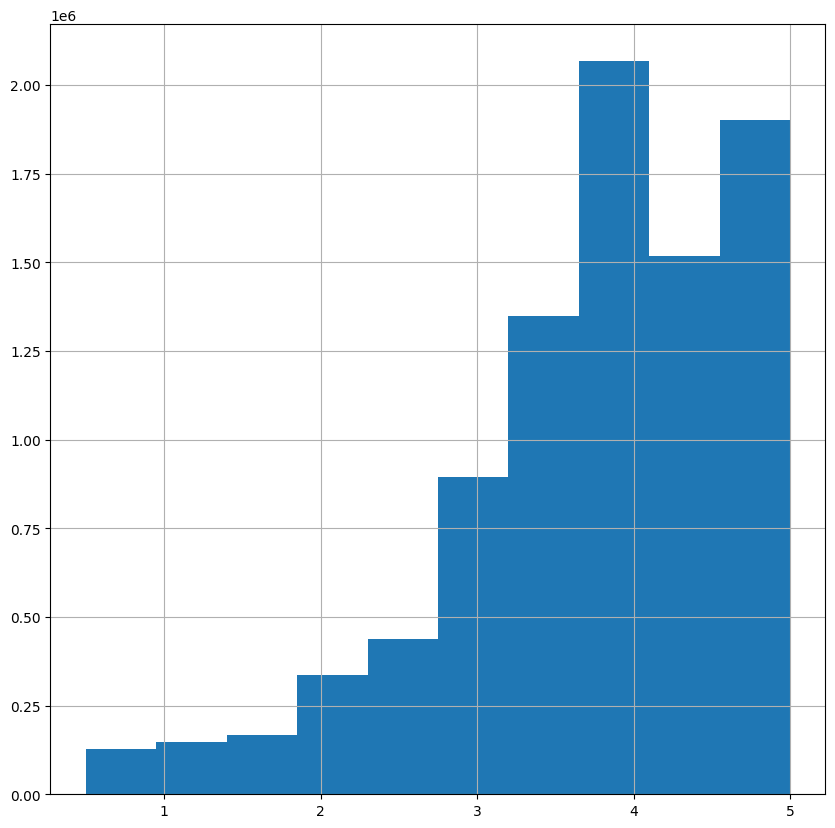

In [14]:
df['rating'].hist(figsize= (10,10))
plt.show()

<ipython-input-15-d7b2f3978c4e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tc = df.corr()


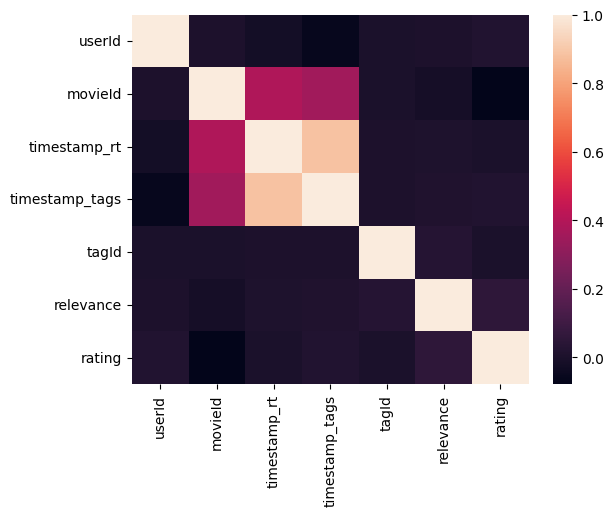

In [15]:
tc = df.corr()
sns.heatmap(tc)
plt.show()


# 6.create a ratings dataframe with average rating and number of ratings

In [16]:
ratings =pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

rating
title                           
'71 (2014)              3.800000
'Round Midnight (1986)  4.500000
'Salem's Lot (2004)     5.000000
'burbs, The (1989)      3.336735
'night Mother (1986)    4.000000

In [17]:
ratings['rating_numbers'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [18]:
ratings.head()

rating  rating_numbers
title                                           
'71 (2014)              3.800000             220
'Round Midnight (1986)  4.500000              12
'Salem's Lot (2004)     5.000000              18
'burbs, The (1989)      3.336735             392
'night Mother (1986)    4.000000              48

# 7. Create Pivot table

In [19]:
df.head()

userId  movieId  timestamp_rt       tag_by_user  timestamp_tags gen_tag  \
0       3      260    1439472239           classic      1439472355     art   
1       3      260    1439472239            sci-fi      1439472256     art   
2     264      260    1543390081            aliens      1543390134     art   
3     264      260    1543390081  oldie but goodie      1543390130     art   
4     264      260    1543390081        scifi cult      1543390105     art   

                                       title                   genres  tagId  \
0  Star Wars: Episode IV - A New Hope (1977)  Action|Adventure|Sci-Fi     75   
1  Star Wars: Episode IV - A New Hope (1977)  Action|Adventure|Sci-Fi     75   
2  Star Wars: Episode IV - A New Hope (1977)  Action|Adventure|Sci-Fi     75   
3  Star Wars: Episode IV - A New Hope (1977)  Action|Adventure|Sci-Fi     75   
4  Star Wars: Episode IV - A New Hope (1977)  Action|Adventure|Sci-Fi     75   

   relevance  rating  
0    0.26025     4.0  
1    0.26025     4.0  
2    0.26025     3.0  
3    0.26025     3.0  
4    0.26025     3.0

## Esta matriz (movieRate) es una representación de las calificaciones dadas por los usuarios a las películas. Las filas representan usuarios, las columnas representan títulos de películas y los valores son las calificaciones. Las celdas que no tienen calificación se llenan con ceros.

In [20]:
movieRate = df.pivot_table(index='userId', columns='title', values='rating')
movieRate.fillna(0, inplace=True)

In [21]:
movieRate.head()

title   '71 (2014)  'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                            
3              0.0                     0.0                  0.0   
4              0.0                     0.0                  0.0   
19             0.0                     0.0                  0.0   
20             0.0                     0.0                  0.0   
43             0.0                     0.0                  0.0   

title   'burbs, The (1989)  'night Mother (1986)  (500) Days of Summer (2009)  \
userId                                                                          
3                      0.0                   0.0                          0.0   
4                      0.0                   0.0                          0.0   
19                     0.0                   0.0                          0.0   
20                     0.0                   0.0                          0.0   
43                     0.0                   0.0                          0.0   

title   (Untitled) (2009)  *batteries not included (1987)  +1 (2013)  \
userId                                                                 
3                     0.0                             0.0        0.0   
4                     0.0                             0.0        0.0   
19                    0.0                             0.0        0.0   
20                    0.0                             0.0        0.0   
43                    0.0                             0.0        0.0   

title   ...And Justice for All (1979)  ...  [REC]³ 3 Génesis (2012)  \
userId                                 ...                            
3                                 0.0  ...                      0.0   
4                                 0.0  ...                      0.0   
19                                0.0  ...                      0.0   
20                                0.0  ...                      0.0   
43                                0.0  ...                      0.0   

title   eXistenZ (1999)  iBoy (2017)  \
userId                                 
3                   0.0          0.0   
4                   0.0          0.0   
19                  0.0          0.0   
20                  0.0          0.0   
43                  0.0          0.0   

title   loudQUIETloud: A Film About the Pixies (2006)  xXx (2002)  \
userId                                                              
3                                                 0.0         0.0   
4                                                 0.0         0.0   
19                                                0.0         0.0   
20                                                0.0         0.0   
43                                                0.0         0.0   

title   xXx: Return of Xander Cage (2017)  xXx: State of the Union (2005)  \
userId                                                                      
3                                     0.0                             0.0   
4                                     0.0                             0.0   
19                                    0.0                             0.0   
20                                    0.0                             0.0   
43                                    0.0                             0.0   

title   ¡Three Amigos! (1986)  À nos amours (1983)  \
userId                                               
3                         0.0                  0.0   
4                         0.0                  0.0   
19                        0.0                  0.0   
20                        0.0                  0.0   
43                        0.0                  0.0   

title   À nous la liberté (Freedom for Us) (1931)  
userId                                             
3                                             0.0  
4                                             0.0  
19                                            0.0  
20             

# 8.Recommendation system

Calcular la correlación entre la película de entrada (la película para la cual queremos hacer recomendaciones) y todas las demás películas en la matriz movieRate

Calcula la **correlación de Pearson** entre las calificaciones de cada película en movieRate y las calificaciones del usuario especificado por user_rating.
La función **corrwith** compara las calificaciones de la película de entrada con las calificaciones de cada otra película en términos de su similitud. Esto puede ayudar a identificar películas que tienen calificaciones similares por parte de los usuarios.


La variable min_rating_count en el código que proporcionaste es un umbral utilizado para filtrar las películas recomendadas basándose en el número mínimo de calificaciones que deben tener. Veamos cómo se utiliza en la función

In [22]:
def recommendMovies(name , min_rating_count = 50):
    user_rating = movieRate[name]
    similar_movies = movieRate.corrwith(user_rating)
    corr_movies = pd.DataFrame(similar_movies, columns=['Correlation'])
    corr_movies.dropna(inplace=True)
    #corr_movies.sort_values('Correlation', ascending=False).head(10)
    # Joining the rating_number list so that we can filter basis minimum count of ratings to be considered
    # for recommending a movie
    corr_movies = corr_movies.join(ratings['rating_numbers'], how='left', lsuffix='_left', rsuffix='_right')

    final = corr_movies[corr_movies['rating_numbers']>min_rating_count].sort_values('Correlation', ascending=False)
    return final

In [23]:
user_rating = movieRate["Harry Potter and the Goblet of Fire (2005)"]
similar_movies = movieRate.corrwith(user_rating)
corr_movies = pd.DataFrame(similar_movies, columns=['Correlation'])
corr_movies.dropna(inplace=True)

In [24]:
recommendations = recommendMovies('Harry Potter and the Goblet of Fire (2005)')
recommendations.head(n=10)

Correlation  \
title                                                             
Harry Potter and the Goblet of Fire (2005)             1.000000   
Harry Potter and the Prisoner of Azkaban (2004)        0.558406   
Harry Potter and the Chamber of Secrets (2002)         0.557424   
Harry Potter and the Sorcerer's Stone (a.k.a. H...     0.537162   
Harry Potter and the Order of the Phoenix (2007)       0.517574   
Harry Potter and the Half-Blood Prince (2009)          0.440126   
Harry Potter and the Deathly Hallows: Part 1 (2...     0.417556   
Harry Potter and the Deathly Hallows: Part 2 (2...     0.314454   
Chronicles of Narnia: The Lion, the Witch and t...     0.283126   
Pirates of the Caribbean: At World's End (2007)        0.274031   

                                                    rating_numbers  
title                                                               
Harry Potter and the Goblet of Fire (2005)                    5654  
Harry Potter and the Prisoner of Azkaban (2004)               4610  
Harry Potter and the Chamber of Secrets (2002)                3059  
Harry Potter and the Sorcerer's Stone (a.k.a. H...            6984  
Harry Potter and the Order of the Phoenix (2007)              2192  
Harry Potter and the Half-Blood Prince (2009)                 3624  
Harry Potter and the Deathly Hallows: Part 1 (2...            6432  
Harry Potter and the Deathly Hallows: Part 2 (2...            3798  
Chronicles of Narnia: The Lion, the Witch and t...            4763  
Pirates of the Caribbean: At World's End (2007)               4428

# Conclusion

1. we build a collaborative recommendation system to recommend movies.
2. memory based approch is used.

**Enfoques colaborativos basados en la memoria**

Las principales características de usuario-usuario e ítem-ítem se aproximan a que utilizan solo información de la matriz de interacción usuario-ítem y no asumen ningún modelo para producir nuevas recomendaciones.


## Similitud con Pearson
**.corr()**

**df.corr(method='pearson'):**

Esta función calcula la correlación entre las columnas de un DataFrame.
method='pearson' indica que se está utilizando el coeficiente de correlación de Pearson, que mide la correlación lineal entre dos variables continuas. Toma valores entre -1 y 1, donde 1 significa una correlación positiva perfecta, -1 significa una correlación negativa perfecta, y 0 significa ausencia de correlación lineal.
En el contexto del código que proporcionaste, se utiliza para calcular la correlación entre todas las columnas del DataFrame df.

In [25]:
ratings = df.copy()

In [26]:
userRatings = ratings.pivot_table(index=['userId'],columns=['title'],values='rating')
userRatings.head()
print("Before: ",userRatings.shape)
userRatings = userRatings.dropna(thresh=10, axis=1).fillna(0,axis=1)
#userRatings.fillna(0, inplace=True)
print("After: ",userRatings.shape)

Before:  (12918, 12104)
After:  (12918, 3962)


In [27]:
corrMatrix = userRatings.corr(method='pearson')
corrMatrix.head()

title                              'burbs, The (1989)  \
title                                                   
'burbs, The (1989)                           1.000000   
(500) Days of Summer (2009)                  0.009411   
10 Cloverfield Lane (2016)                   0.051558   
10 Items or Less (2006)                      0.049914   
10 Things I Hate About You (1999)            0.031373   

title                              (500) Days of Summer (2009)  \
title                                                            
'burbs, The (1989)                                    0.009411   
(500) Days of Summer (2009)                           1.000000   
10 Cloverfield Lane (2016)                            0.071827   
10 Items or Less (2006)                               0.066188   
10 Things I Hate About You (1999)                     0.159382   

title                              10 Cloverfield Lane (2016)  \
title                                                           
'burbs, The (1989)                                   0.051558   
(500) Days of Summer (2009)                          0.071827   
10 Cloverfield Lane (2016)                           1.000000   
10 Items or Less (2006)                              0.018365   
10 Things I Hate About You (1999)                    0.088895   

title                              10 Items or Less (2006)  \
title                                                        
'burbs, The (1989)                                0.049914   
(500) Days of Summer (2009)                       0.066188   
10 Cloverfield Lane (2016)                        0.018365   
10 Items or Less (2006)                           1.000000   
10 Things I Hate About You (1999)                 0.030563   

title                              10 Things I Hate About You (1999)  \
title                                                                  
'burbs, The (1989)                                          0.031373   
(500) Days of Summer (2009)                                 0.159382   
10 Cloverfield Lane (2016)                                  0.088895   
10 Items or Less (2006)                                     0.030563   
10 Things I Hate About You (1999)                           1.000000   

title                              10,000 BC (2008)  101 Dalmatians (1996)  \
title                                                                        
'burbs, The (1989)                        -0.001340               0.032196   
(500) Days of Summer (2009)                0.002250               0.040375   
10 Cloverfield Lane (2016)                 0.051565               0.037949   
10 Items or Less (2006)                   -0.001137               0.033167   
10 Things I Hate About You (1999)          0.057888               0.095330   

title                              101 Dalmatians (One Hundred and One Dalmatians) (1961)  \
title                                                                                       
'burbs, The (1989)                                                          0.101357        
(500) Days of Summer (2009)                                                 0.050690        
10 Cloverfield Lane (2016)                                                  0.056280        
10 Items or Less (2006)                                                     0.027710        
10 Things I Hate About You (1999)                                           0.100500        

title                              11:14 (2003)  12 (2007)  ...  \
title                                                       ...   
'burbs, The (1989)                     0.034663   0.061485  ...   
(500) Days of Summer (2009)            0.072657   0.013820  ...   
10 Cloverfield Lane (2016)             0.056452   0.023197  ...   
10 Items or Less (2006)                0.035744   0.063130  ...   
10 Things I Hate About You (1999)      0.079789   0.020529  ...   

title                              Zodiac (2007)  \
title               

In [28]:
def get_similar(movie_name,rating):
    similar_ratings = corrMatrix[movie_name]*(rating-2.5)
    similar_ratings = similar_ratings.sort_values(ascending=False)
    #print(type(similar_ratings))
    return similar_ratings

In [29]:
romantic_lover = [("(500) Days of Summer (2009)",5),("Alice in Wonderland (2010)",3),
                  ("Aliens (1986)",1),("2001: A Space Odyssey (1968)",2)]
similar_movies = pd.DataFrame()
for movie,rating in romantic_lover:
    similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)

similar_movies.head(14)
similar_movies.sum().sort_values(ascending=False).head(14)

<ipython-input-29-4635b18eae04>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)
<ipython-input-29-4635b18eae04>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)
<ipython-input-29-4635b18eae04>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)
<ipython-input-29-4635b18eae04>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar(movie,ratin

title
(500) Days of Summer (2009)                  2.504148
Alice in Wonderland (2010)                   0.628119
Definitely, Maybe (2008)                     0.478287
Love and Other Drugs (2010)                  0.445546
Perks of Being a Wallflower, The (2012)      0.431016
Nick and Norah's Infinite Playlist (2008)    0.409706
Up in the Air (2009)                         0.409039
Into the Wild (2007)                         0.399991
Crazy, Stupid, Love. (2011)                  0.390995
Yes Man (2008)                               0.383878
He's Just Not That Into You (2009)           0.371512
Holiday, The (2006)                          0.365468
27 Dresses (2008)                            0.365398
Midnight in Paris (2011)                     0.362224
dtype: float64

In [30]:
action_lover = [("Amazing Spider-Man, The (2012)",5),("Mission: Impossible III (2006)",4),
                ("Toy Story 3 (2010)",2),("2 Fast 2 Furious (Fast and the Furious 2, The) (2003)",4)]
similar_movies = pd.DataFrame()
for movie,rating in action_lover:
    similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)

similar_movies.head(10)
similar_movies.sum().sort_values(ascending=False).head(14)

<ipython-input-30-ab0002bf8ec7>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)
<ipython-input-30-ab0002bf8ec7>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)
<ipython-input-30-ab0002bf8ec7>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)
<ipython-input-30-ab0002bf8ec7>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar(movie,ratin

title
Amazing Spider-Man, The (2012)                           2.643574
Mission: Impossible III (2006)                           1.838480
2 Fast 2 Furious (Fast and the Furious 2, The) (2003)    1.684535
Iron Man 3 (2013)                                        1.131170
Fast and the Furious, The (2001)                         1.112285
Pirates of the Caribbean: On Stranger Tides (2011)       1.084071
Wolverine, The (2013)                                    1.080912
Captain America: The Winter Soldier (2014)               1.060812
The Amazing Spider-Man 2 (2014)                          1.053401
Mission: Impossible II (2000)                            0.989598
Mission: Impossible (1996)                               0.940629
Rocky Balboa (2006)                                      0.921672
Hellboy (2004)                                           0.913843
Mission: Impossible - Ghost Protocol (2011)              0.893898
dtype: float64

In [31]:
movies = [("Harry Potter and the Goblet of Fire (2005)",4)]
similar_movies = pd.DataFrame()
for movie,rating in movies:
    similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)

similar_movies.head(10)
similar_movies.sum().sort_values(ascending=False).head(14)

<ipython-input-31-380c8c8616d2>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)


title
Harry Potter and the Goblet of Fire (2005)                                                        1.500000
Harry Potter and the Prisoner of Azkaban (2004)                                                   0.837609
Harry Potter and the Chamber of Secrets (2002)                                                    0.836137
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)    0.805744
Harry Potter and the Order of the Phoenix (2007)                                                  0.776362
Harry Potter and the Half-Blood Prince (2009)                                                     0.660188
Harry Potter and the Deathly Hallows: Part 1 (2010)                                               0.626334
Harry Potter and the Deathly Hallows: Part 2 (2011)                                               0.471681
Chronicles of Narnia: The Lion, the Witch and the Wardrobe, The (2005)                            0.424689
Pirates of the Caribbean: At Wo